In [26]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import fkplotlib

fkplotlib.use_txfonts()

<IPython.core.display.Javascript object>


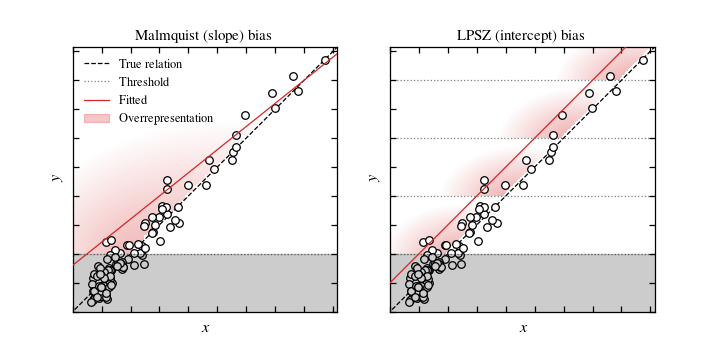

In [33]:
np.random.seed(420)
x = np.random.lognormal(1.0, 1.0, 100)
x[np.argmax(x)] = 10.0
y = np.random.normal(x, 1.0)

plt.close('all')
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

ax = axs[0]
ax.plot(x, y, 'ko', mfc="w", zorder=5)
xlim = np.array(ax.get_xlim())
ax.set_xlim(*xlim)
ax.set_ylim(*xlim)
xlim[0] -= 1
xlim[1] += 1
ax.plot(xlim, xlim, "k--", zorder=4, label="True relation")
ax.fill_between(xlim, xlim[0], 3.0, color="k", alpha=0.2, zorder=6)
ax.axhline(3.0, 0, 1, color="k", ls=":", alpha=0.5, zorder=7, label="Threshold")

x_ov = np.linspace(*xlim, 100)
y_ov = np.linspace(3.0, xlim[1], 100)
x_ov, y_ov = np.meshgrid(x_ov, y_ov)
ov = -np.sqrt((x_ov - 3.0)**2 + 2*(y_ov - 3.0)**2) + 0.5 * x_ov
ov[y_ov < x_ov] = np.nan
ax.imshow(ov, extent=[*xlim, 3.0, xlim[1]], origin="lower", 
          cmap=fkplotlib.cmap_from_colors(["w", "tab:red"]), vmin=-10, vmax=25, zorder=-10.0)
ax.plot(xlim, 0.8 * xlim + 3.0, color="tab:red", label="Fitted", zorder=8)

ax = axs[1]
ax.plot(x, y, 'ko', mfc="w", zorder=5)
xlim = np.array(ax.get_xlim())
ax.set_xlim(*xlim)
ax.set_ylim(*xlim)
xlim[0] -= 1
xlim[1] += 1
ax.plot(xlim, xlim, "k--", zorder=4, label="True relation")
step = 4
x_ov = np.linspace(*xlim, 1000)
y_ov = np.linspace(3, 3 + step, 100)
x_ov, y_ov = np.meshgrid(x_ov, y_ov)

#ov = -y_ov - 3 + 0.5*x_ov
ov = -np.sqrt(0.5*(x_ov - 4)**2 + (y_ov - 2.5)**2)
ov[y_ov < x_ov] = np.nan
ax.fill_between(xlim, xlim[0], 3.0, color="k", alpha=0.2, zorder=6)
for th in np.arange(3, 17, step):
    ax.axhline(th, 0, 1, color="k", ls=":", alpha=0.5, zorder=7)
    ax.imshow(
        ov, extent=[*xlim - 3 + th, th, th + step], origin="lower", interpolation="gaussian",
        cmap=fkplotlib.cmap_from_colors(["w", "tab:red"]), zorder=-10.0,
        vmin=-4, vmax=5
        )
ax.plot(xlim, xlim + 2.0, color="tab:red", label="Fitted", zorder=8)

for ax in axs:
    ax.fill_between([-5, -4], -5, -4, color="tab:red", alpha=0.25, label="Overrepresentation")
    #ax.legend(frameon=False)
    fkplotlib.ax_bothticks(ax)
    ticks = np.arange(int(xlim[0]), int(xlim[1]), 2)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel(r"$x$", fontsize=13)
    ax.set_ylabel(r"$y$", fontsize=13)
axs[0].legend(frameon=False)
axs[0].set_title("Malmquist (slope) bias")
axs[1].set_title("LPSZ (intercept) bias")

fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.91)
fig.savefig("bias_intercept_illu.pdf")

<IPython.core.display.Javascript object>


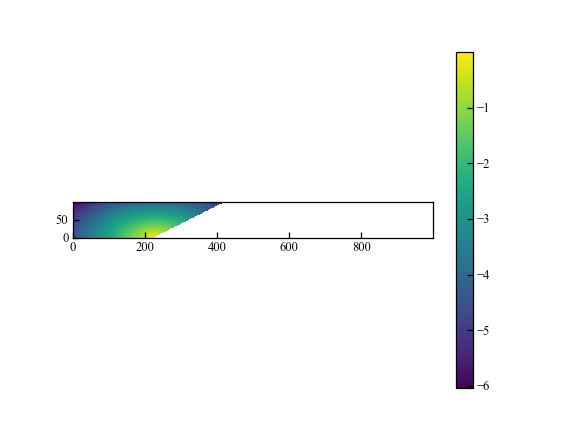

-4.52106160220163


In [6]:
fig, ax = plt.subplots()
im = ax.imshow(ov, origin="lower")
fig.colorbar(im)
print(ov[0, 0])

In [14]:
int(-1.5)

-1

In [ ]:
ov.shape